# Twitter Sentiment Analysis

#### Ziao You

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Strange_Tweets.csv')
df.head()

,user_id,created_at,text,is_quote,is_retweet,retweet_text,retweet_created_at,lang
0,1258001900160548865,2022-07-04T18:03:56Z,Nancy Wheeler in every episode of #StrangerThi...,False,True,Nancy Wheeler in every episode of #StrangerThi...,2022-07-03T05:31:05Z,en
1,701152854489243653,2022-07-04T18:03:55Z,i cannot do this rn\n#StrangerThings https://t...,False,True,i cannot do this rn\n#StrangerThings https://t...,2022-07-02T23:31:03Z,en
2,2527761363,2022-07-04T18:03:55Z,"3 years ago today, #StrangerThings Season 3 wa...",False,True,"3 years ago today, #StrangerThings Season 3 wa...",2022-07-04T12:50:04Z,en
3,1086492588213858304,2022-07-04T17:58:51Z,speedpainting to 80s music #StrangerThings htt...,False,True,speedpainting to 80s music #StrangerThings htt...,2022-07-04T17:46:10Z,en
4,1086492588213858304,2022-07-04T18:02:16Z,The most iconic scenes of #StrangerThings4 #St...,False,True,The most iconic scenes of #StrangerThings4 #St...,2022-07-03T06:25:35Z,en


## 1. Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3281 non-null   int64 
 1   created_at          3281 non-null   object
 2   text                3281 non-null   object
 3   is_quote            3281 non-null   bool  
 4   is_retweet          3281 non-null   bool  
 5   retweet_text        2797 non-null   object
 6   retweet_created_at  2797 non-null   object
 7   lang                3281 non-null   object
dtypes: bool(2), int64(1), object(5)
memory usage: 160.3+ KB


In [4]:
print('Dataset length: ', df.shape[0])
print('Dataset feature numbers: ', df.shape[1])


Dataset length:  3281
Dataset feature numbers:  8


In [5]:
# The tweets language distribution
df['lang'].value_counts()

en    3281
Name: lang, dtype: int64

In [6]:
df['retweet_created_at'] = pd.to_datetime(df['retweet_created_at'])
df['retweet_created_at']

0      2022-07-03 05:31:05+00:00
1      2022-07-02 23:31:03+00:00
2      2022-07-04 12:50:04+00:00
3      2022-07-04 17:46:10+00:00
4      2022-07-03 06:25:35+00:00
                  ...           
3276   2022-07-03 20:20:50+00:00
3277   2022-07-03 23:08:47+00:00
3278                         NaT
3279                         NaT
3280   2022-07-03 13:25:49+00:00
Name: retweet_created_at, Length: 3281, dtype: datetime64[ns, UTC]

In [7]:
df['retweet_created_at'].min()

Timestamp('2022-05-25 15:22:09+0000', tz='UTC')

In [8]:
# date range of tweets
print('The date range of this dataset: ', (df['retweet_created_at'].min(), df['retweet_created_at'].max()))

The date range of this dataset:  (Timestamp('2022-05-25 15:22:09+0000', tz='UTC'), Timestamp('2022-07-04 18:01:11+0000', tz='UTC'))


## 2. Data pre-processing

### 2.1 Removing noise

In [9]:
import nltk
nltk.download('stopwords')

from string import punctuation
import re
import unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziaoyou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# 1. lower case
# 2. remove new line character
# 3. remove urls
# 4. remove hashtags, mentions
# 5. remove punctuations
# 6. remove numbers

def clean_round1(text):
    text = text.lower()
    # new line chr
    text = re.sub('\n', '', text)
    # urls
    text = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
    # remove hashtags and user mentions
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    # punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    # remove numbers
    text = re.sub('\w*\d\w*', '', text)
    return text


In [11]:
df['clean_round1'] = pd.DataFrame(df['text'].apply(clean_round1))
df.head()

,user_id,created_at,text,is_quote,is_retweet,retweet_text,retweet_created_at,lang,clean_round1
0,1258001900160548865,2022-07-04T18:03:56Z,Nancy Wheeler in every episode of #StrangerThi...,False,True,Nancy Wheeler in every episode of #StrangerThi...,2022-07-03 05:31:05+00:00,en,nancy wheeler in every episode of
1,701152854489243653,2022-07-04T18:03:55Z,i cannot do this rn\n#StrangerThings https://t...,False,True,i cannot do this rn\n#StrangerThings https://t...,2022-07-02 23:31:03+00:00,en,i cannot do this rn
2,2527761363,2022-07-04T18:03:55Z,"3 years ago today, #StrangerThings Season 3 wa...",False,True,"3 years ago today, #StrangerThings Season 3 wa...",2022-07-04 12:50:04+00:00,en,years ago today season was released ❤️📺✨
3,1086492588213858304,2022-07-04T17:58:51Z,speedpainting to 80s music #StrangerThings htt...,False,True,speedpainting to 80s music #StrangerThings htt...,2022-07-04 17:46:10+00:00,en,speedpainting to music
4,1086492588213858304,2022-07-04T18:02:16Z,The most iconic scenes of #StrangerThings4 #St...,False,True,The most iconic scenes of #StrangerThings4 #St...,2022-07-03 06:25:35+00:00,en,the most iconic scenes of


In [12]:
# remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# clean and remove repeated characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [13]:
# 1. remove emojis
# 2. remove repeated numbers

def clean_round2(text):
    # remove emojis
    text = ''.join(c for c in text if not unicodedata.combining(c))
    text = remove_accented_chars(text)
    text = cleaning_repeating_char(text)
    return text


In [14]:
df['clean_round2'] = pd.DataFrame(df['clean_round1'].apply(clean_round2))
df.head()

,user_id,created_at,text,is_quote,is_retweet,retweet_text,retweet_created_at,lang,clean_round1,clean_round2
0,1258001900160548865,2022-07-04T18:03:56Z,Nancy Wheeler in every episode of #StrangerThi...,False,True,Nancy Wheeler in every episode of #StrangerThi...,2022-07-03 05:31:05+00:00,en,nancy wheeler in every episode of,nancy wheeler in every episode of
1,701152854489243653,2022-07-04T18:03:55Z,i cannot do this rn\n#StrangerThings https://t...,False,True,i cannot do this rn\n#StrangerThings https://t...,2022-07-02 23:31:03+00:00,en,i cannot do this rn,i cannot do this rn
2,2527761363,2022-07-04T18:03:55Z,"3 years ago today, #StrangerThings Season 3 wa...",False,True,"3 years ago today, #StrangerThings Season 3 wa...",2022-07-04 12:50:04+00:00,en,years ago today season was released ❤️📺✨,years ago today season was released
3,1086492588213858304,2022-07-04T17:58:51Z,speedpainting to 80s music #StrangerThings htt...,False,True,speedpainting to 80s music #StrangerThings htt...,2022-07-04 17:46:10+00:00,en,speedpainting to music,speedpainting to music
4,1086492588213858304,2022-07-04T18:02:16Z,The most iconic scenes of #StrangerThings4 #St...,False,True,The most iconic scenes of #StrangerThings4 #St...,2022-07-03 06:25:35+00:00,en,the most iconic scenes of,the most iconic scenes of


In [15]:
import contractions
def clean_round3(text):
    text = contractions.fix(text)
    return text


In [16]:
df['clean_round3'] = df['clean_round2'].apply(clean_round3)
df.head()

,user_id,created_at,text,is_quote,is_retweet,retweet_text,retweet_created_at,lang,clean_round1,clean_round2,clean_round3
0,1258001900160548865,2022-07-04T18:03:56Z,Nancy Wheeler in every episode of #StrangerThi...,False,True,Nancy Wheeler in every episode of #StrangerThi...,2022-07-03 05:31:05+00:00,en,nancy wheeler in every episode of,nancy wheeler in every episode of,nancy wheeler in every episode of
1,701152854489243653,2022-07-04T18:03:55Z,i cannot do this rn\n#StrangerThings https://t...,False,True,i cannot do this rn\n#StrangerThings https://t...,2022-07-02 23:31:03+00:00,en,i cannot do this rn,i cannot do this rn,i cannot do this right now
2,2527761363,2022-07-04T18:03:55Z,"3 years ago today, #StrangerThings Season 3 wa...",False,True,"3 years ago today, #StrangerThings Season 3 wa...",2022-07-04 12:50:04+00:00,en,years ago today season was released ❤️📺✨,years ago today season was released,years ago today season was released
3,1086492588213858304,2022-07-04T17:58:51Z,speedpainting to 80s music #StrangerThings htt...,False,True,speedpainting to 80s music #StrangerThings htt...,2022-07-04 17:46:10+00:00,en,speedpainting to music,speedpainting to music,speedpainting to music
4,1086492588213858304,2022-07-04T18:02:16Z,The most iconic scenes of #StrangerThings4 #St...,False,True,The most iconic scenes of #StrangerThings4 #St...,2022-07-03 06:25:35+00:00,en,the most iconic scenes of,the most iconic scenes of,the most iconic scenes of


### 2.2 Normalize: Lemmatization

In [19]:
def clean_round4(text):
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # stemming
    # stemmer = PorterStemmer()
    # text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [21]:
df['clean_round4'] = pd.DataFrame(df['clean_round3'].apply(clean_round4))
df.head()

,user_id,created_at,text,is_quote,is_retweet,retweet_text,retweet_created_at,lang,clean_round1,clean_round2,clean_round3,clean_round4
0,1258001900160548865,2022-07-04T18:03:56Z,Nancy Wheeler in every episode of #StrangerThi...,False,True,Nancy Wheeler in every episode of #StrangerThi...,2022-07-03 05:31:05+00:00,en,nancy wheeler in every episode of,nancy wheeler in every episode of,nancy wheeler in every episode of,nancy wheeler in every episode of
1,701152854489243653,2022-07-04T18:03:55Z,i cannot do this rn\n#StrangerThings https://t...,False,True,i cannot do this rn\n#StrangerThings https://t...,2022-07-02 23:31:03+00:00,en,i cannot do this rn,i cannot do this rn,i cannot do this right now,i cannot do this right now
2,2527761363,2022-07-04T18:03:55Z,"3 years ago today, #StrangerThings Season 3 wa...",False,True,"3 years ago today, #StrangerThings Season 3 wa...",2022-07-04 12:50:04+00:00,en,years ago today season was released ❤️📺✨,years ago today season was released,years ago today season was released,year ago today season wa released
3,1086492588213858304,2022-07-04T17:58:51Z,speedpainting to 80s music #StrangerThings htt...,False,True,speedpainting to 80s music #StrangerThings htt...,2022-07-04 17:46:10+00:00,en,speedpainting to music,speedpainting to music,speedpainting to music,speedpainting to music
4,1086492588213858304,2022-07-04T18:02:16Z,The most iconic scenes of #StrangerThings4 #St...,False,True,The most iconic scenes of #StrangerThings4 #St...,2022-07-03 06:25:35+00:00,en,the most iconic scenes of,the most iconic scenes of,the most iconic scenes of,the most iconic scene of


### 2.3 Tokenization

#### 2.3.1 nltk.tokenizer

In [22]:
# libraries
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [24]:
sample = df['clean_round4'][:5]

In [37]:
# tokenize the tweets
tweet_tokens = []
for i in range(len(sample)):
    tweet_tokens.append(tokenizer.tokenize(sample[i]))

In [38]:
tweet_tokens

[['nancy', 'wheeler', 'in', 'every', 'episode', 'of'],
 ['i', 'cannot', 'do', 'this', 'right', 'now'],
 ['year', 'ago', 'today', 'season', 'wa', 'released'],
 ['speedpainting', 'to', 'music'],
 ['the', 'most', 'iconic', 'scene', 'of']]

#### 2.3.2 nltk.word_tokenize (better)

`punkt` is a module from `nltk` and a model that has been trained to help you tokenize phrases and sentences more realistically - meaning, it is not just a split on white space.   
This method does take a bit more time, however.

In [40]:
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [41]:
# use the punkt tokenizer to tokenize the tweets
tweet_punktokens = []
for i in range(len(sample)):
    tweet_punktokens.append(word_tokenize(sample[i]))

In [42]:
tweet_punktokens[:5]

[['nancy', 'wheeler', 'in', 'every', 'episode', 'of'],
 ['i', 'can', 'not', 'do', 'this', 'right', 'now'],
 ['year', 'ago', 'today', 'season', 'wa', 'released'],
 ['speedpainting', 'to', 'music'],
 ['the', 'most', 'iconic', 'scene', 'of']]

#### 2.3.3 nltl.TweetTokenizer (better)

`TweetTokenizer` is a tokenizer specifically designed for micro-blogging tokenization tasks!

In [43]:
from nltk.tokenize import TweetTokenizer

In [44]:
tweet_tweettokens = []
for i in range(len(sample)):
    tweet_tweettokens.append(TweetTokenizer().tokenize(sample[i]))

In [45]:
tweet_tweettokens[:5]

[['nancy', 'wheeler', 'in', 'every', 'episode', 'of'],
 ['i', 'cannot', 'do', 'this', 'right', 'now'],
 ['year', 'ago', 'today', 'season', 'wa', 'released'],
 ['speedpainting', 'to', 'music'],
 ['the', 'most', 'iconic', 'scene', 'of']]

#### 2.4 Term-Document Matrix

For this step, we can chose to use our own tokenizer - a lot of people perfer to create their own tokenizer to meet their specific data needs - however for this analysis we will use the built in tokenizer in the `CountVectorizer` function.

In [80]:
# create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df['clean_round4'])
data_tdm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_tdm_index = data_tdm.index
data_tdm

,aa,aangs,ab,abeg,ability,able,absolute,absolutely,abuja,accepted,...,yo,young,youngji,youtube,yt,yuri,zaimprowizowa,ze,zl,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# pickle for later use
data_tdm.to_pickle('tdm.pkl')

### 3.EDA

In [92]:
# look at the most common words
# create a list of all the words in all the tweets
tweet_ls = []
for tweet in data_clean_3['text']:
    words = tweet.split()
    for word in words:
        tweet_ls.append(word)

In [95]:
tweet_ls[0:8]

['nancy', 'wheeler', 'in', 'every', 'episode', 'of', 'i', 'cannot']

In [96]:
from collections import Counter
Counter = Counter(tweet_ls)

Counter.most_common()

[('the', 2022),
 ('of', 1248),
 ('to', 1117),
 ('in', 948),
 ('season', 808),
 ('is', 708),
 ('i', 672),
 ('will', 628),
 ('and', 621),
 ('that', 554),
 ('a', 545),
 ('this', 492),
 ('duffer', 450),
 ('brothers', 449),
 ('have', 401),
 ('they', 374),
 ('episode', 344),
 ('not', 326),
 ('nancy', 321),
 ('eddie', 310),
 ('every', 297),
 ('wheeler', 293),
 ('final', 289),
 ('things', 277),
 ('be', 269),
 ('was', 259),
 ('writing', 255),
 ('me', 253),
 ('best', 245),
 ('it', 231),
 ('you', 228),
 ('scene', 226),
 ('were', 221),
 ('for', 221),
 ('say', 188),
 ('from', 187),
 ('about', 179),
 ('one', 178),
 ('some', 176),
 ('music', 173),
 ('scenes', 169),
 ('no', 167),
 ('improvised', 163),
 ('do', 160),
 ('my', 157),
 ('speedpainting', 155),
 ('fact', 154),
 ('next', 151),
 ('part', 150),
 ('gtgtgt', 145),
 ('stranger', 143),
 ('start', 142),
 ('via', 141),
 ('on', 140),
 ('we', 140),
 ('month', 140),
 ('he', 139),
 ('e', 137),
 ('show', 126),
 ('nao', 125),
 ('did', 123),
 ('am', 123),
 (

In [108]:
# clearly the stopwords in countVectorizer are not that great
# retry with custom stop-words

add_stopwords = ['episode', 'nancy', 'eddie', 'wheeler', 'duffer', 'eleven', 'will', 'byers' 'joseph', 'quinn', 
'steve', 'lucas', 'sinclair', 'joyce', 'brothers']

# update TDM with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('corpus.pkl')

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index


In [109]:
# pickle TDM
import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('tdm_stop.pkl')

In [110]:
tweet_ls = [token for token in tweet_ls if token not in stop_words]
tweet_words = ' '.join(tweet_ls)

In [111]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=100)

(-0.5, 399.5, 199.5, -0.5)

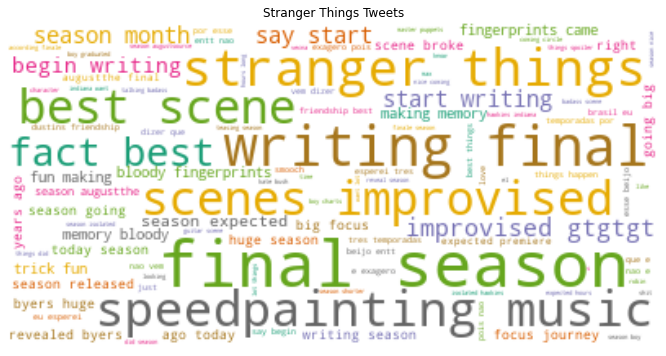

In [112]:
plt.rcParams['figure.figsize'] = (16, 6)
wc.generate(tweet_words)
plt.title('Stranger Things Tweets')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### 3. Lexicon-based sentiment analysis

In this section, we are going to find sentiments of the tweets using a few common lexicons.  
*AFINN*: lexicon assigns phrases a score from -5 to 5 where -5 is the negative sentiment and 5 indicates positive sentiment.  

*Here, in lexicon based sentiment analysis we already have a given set of dictionary of words with each labelled as positive negative, neutral sentiments along with polarity , parts of speech and subjectivity classifiers, mood, modality and the like. A sentence is tokenized and each token is matched with the available words in the model to find out its context and sentiment (if any). A combining function such as sum or average is taken to make the final prediction*

*SentiNet*: used for opinion mining; results in scores, positive, negative, and objective.

*VADER*: Valence Aware Dictionary and Sentiment Reasoner - this lexicon is specifically attuned to sentiments expressed in social media. It is open-source and is able to detect polarity and intensity of emotion diretly to unlabeled data. 

One thing to note is that these lexicons are based on unigrams.

In [113]:
# check it out!
from afinn import Afinn
afn = Afinn(emoticons=True)
afn.score('I love this movie')

3.0

In [109]:
# get sentiment lexicons
# get the AFINN lexicon
# !pip install afinn
tweets = data['clean_tweet']

In [110]:
tweets[1]

'cannot rn strangerthings'

In [115]:
# compute scores (polarity) and labels
scores = [afn.score(tweet) for tweet in corpus.text]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]
     
# dataframe creation
af_df = pd.DataFrame()
af_df['tweet'] =  corpus.text
af_df['scores'] = scores
af_df['sentiments'] = sentiment

In [116]:
af_df[:10]

,tweet,scores,sentiments
0,nancy wheeler in every episode of,0.0,neutral
1,i cannot do this right now,0.0,neutral
2,years ago today season was released,0.0,neutral
3,speedpainting to music,0.0,neutral
4,the most iconic scenes of,0.0,neutral
5,nancy wheeler in every episode of,0.0,neutral
6,my boy graduated sm,0.0,neutral
7,many thoughts head full,0.0,neutral
8,this scene broke me,-1.0,negative
9,how many variants does it take,0.0,neutral


In [123]:
af_df['scores'].describe()

count    3281.000000
mean        0.419994
std         2.190003
min       -14.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: scores, dtype: float64

In [117]:
# we can create a corpus level sentiment by averaging the scores of the tweets

print('The general AFINN score is: ', sum(af_df['scores'])/len(af_df))

The general AFINN score is:  0.4199939042974703


*What does this score tell us about our data?*

*What thoughts do you have about how people on Twitter feel about Stranger Things in general?*

#### Optional Exercise:  

`SentiWordNet` is a lexical resource for opinion mining. SentiWordNet assigns to each set of WordNet three sentiment scores: positivity, negativity, objectivity.

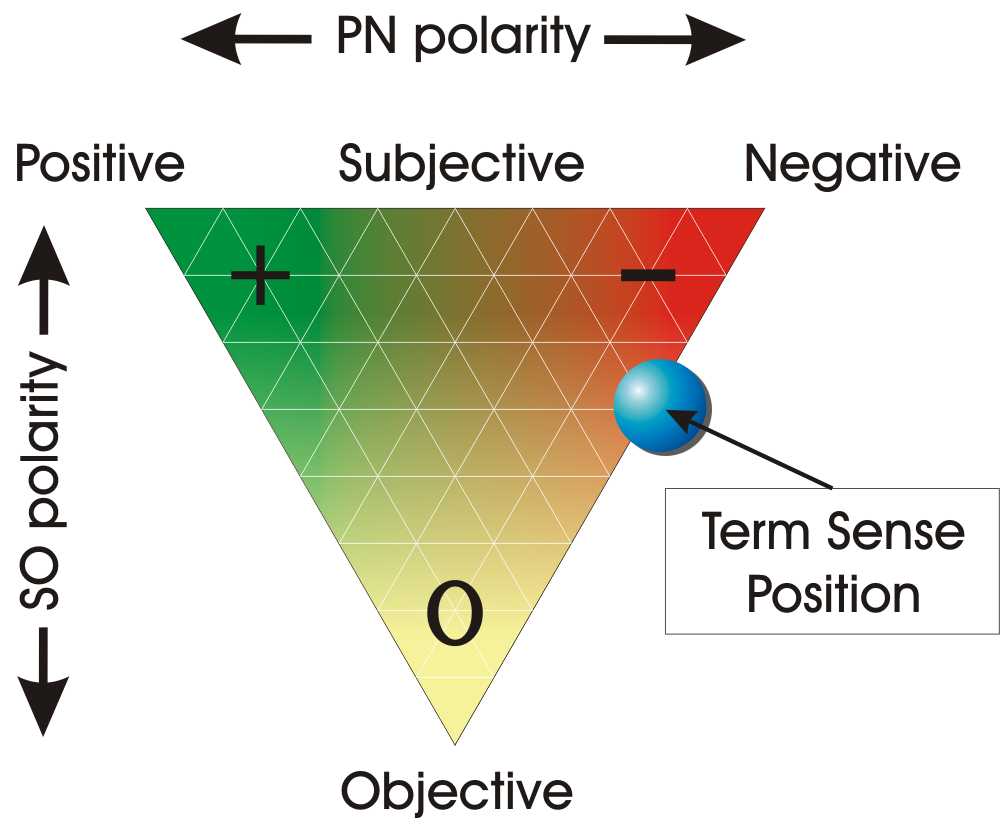

`VADER` (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

It takes in a sentence and returns a dictionary of four values: 

- negative
- neutral
- positive
- compound (computed by normalizing the scores above)

Let's see what values SentiWordNet and VADER come up with.

In [119]:
# SentiWrodNet
# nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
word = list(swn.senti_synsets('excited','a'))[0]
print("Positive score : ",word.pos_score())
print("Negative score : ",word.neg_score())
print("Objective score : ",word.obj_score())

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/laylabouzoubaa/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


Positive score :  0.25
Negative score :  0.5
Objective score :  0.25


In [ ]:
# on our tweets

VADER

In [121]:
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/laylabouzoubaa/nltk_data...


In [122]:
b = 'i love cats #catmama'
sid.polarity_scores(b)

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [ ]:
# on our tweets

---

### 4. Supervised Sentiment Analysis


We can train a classifier to categorize texts into a variety of sentiments. In order to train this classifier, we would need to feed the algorithm the correct sentiments (sources of truth) so that it can learn the patterns to then classify text without sentiment values (unlabeled).

For simplicity we will build a *binary classifier* to associate tweets with a positive or a negative sentiment. 
We will need to split the dataset into two parts. The purpose of the first part is to build the model, whereas the next part tests the performance of the model.

In [124]:
# tweets about airline performance

airline = pd.read_csv('Tweets.csv')
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [125]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [126]:
# get values of sentiment
airline['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [127]:
# for the sake of this exercise, we will only keep positive or negative tweets
airline = airline[airline['airline_sentiment'] != 'neutral']

#### 4.1 Pre-process tweets

In [132]:
# this time we will turn on the toknization and lemmatization
def process_tweets(tweet):
    doc = clean_round1(tweet)
    doc = clean_round2(doc)
    doc = clean_round3 (doc)
    return doc

In [133]:
airline['clean_tweet'] = airline['text'].apply(process_tweets)

In [134]:
airline['clean_tweet'][0:5]

1     plus you have added commercials to the experi...
3     its really aggressive to blast obnoxious ente...
4              and its a really big bad thing about it
5     seriously would pay  a flight for seats that ...
6     yes nearly every time i fly vx this ear worm ...
Name: clean_tweet, dtype: object

For this analysis, we will train a Naive Bayes classifier. NB is one of the simplest and fastest text classification algorithms that is commonly used for tasks like sentiment analysis, spam filtering, or recommendations. [Learn more about NB](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)

In [140]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(airline['clean_tweet'], airline['airline_sentiment'], stratify= airline['airline_sentiment'], test_size=0.25, random_state=2022)

In [144]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [145]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [146]:
model.score(x_test, y_test)

0.9012474012474012

In [147]:
# let's try it out!

model.predict(vec.transform(['stranger things is one of my favorite shows']))

array(['positive'], dtype='<U8')